# Tarea del Curso cero del Bongo Physics

Importamos las librerías.

In [1]:
import sys
import os
# Agregar el directorio padre al path
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd())
sys.path.insert(0, parent_dir)

import scripts.decaimiento as de

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

Trabajamos con un simulación de una muestra de Rodio a 1 muCi.

In [3]:
# Muestra de Rodio a 1 muCi
# masa incial de la muestra en g
mass=1.22E-11
# masa molar g/mol (Rh 99)
molarmass=98.91
# numero de átomos en la muestra inicial = masa / masa molar * NA
N=mass/molarmass*6.022E23
# constante de tiempo en segundos = segundos por hora * horas por dia * vida media en dias / log2
Tau=3600*24*16.1/math.log(2)
# tiempo de observacion en segundos
T=1.0
# distancia del detector a la muestra en cm
D=10
# área efectiva de detección en cm2
A=100

Generamos los datos de la 

In [4]:
# numero de cuentas por segundo vs antiguedad de la muestra en dias
# ejemplo con 10 observaciones a los 0, 10, 20, etc dias. 10 s de observación en cada ocasión
muestras=de.toma_muestras([0,10,20,30,40,50,60,70,80,90],[10.0]*10)

## Proyecto
¿Puedes preparar una representación gráfica que muestre 5 vidas medias?  
Utiliza este conjunto de datos

In [5]:
muestras

,fecha_obs_dias,t_obs_s,cuentas
0,0,10.0,29433
1,10,10.0,19172
2,20,10.0,12461
3,30,10.0,8085
4,40,10.0,5294
5,50,10.0,3410
6,60,10.0,2237
7,70,10.0,1450
8,80,10.0,939
9,90,10.0,608


## Respuesta personal
Aquí lo que hago es que tomo los datos y los gráfico según lo que necesito.

In [6]:
# Guardamos los datos en un archivo externo.
muestras.to_csv("../data/muestras.csv")

In [ ]:
# Solo usar está línea si se desea cargar el archivo y no construir los datos desde cero.
muestras = pd.read_csv("../data/muestras.csv")
muestras.head(15)

,Unnamed: 0,fecha_obs_dias,t_obs_s,cuentas
0,0,0,10.0,29433
1,1,10,10.0,19172
2,2,20,10.0,12461
3,3,30,10.0,8085
4,4,40,10.0,5294
5,5,50,10.0,3410
6,6,60,10.0,2237
7,7,70,10.0,1450
8,8,80,10.0,939
9,9,90,10.0,608


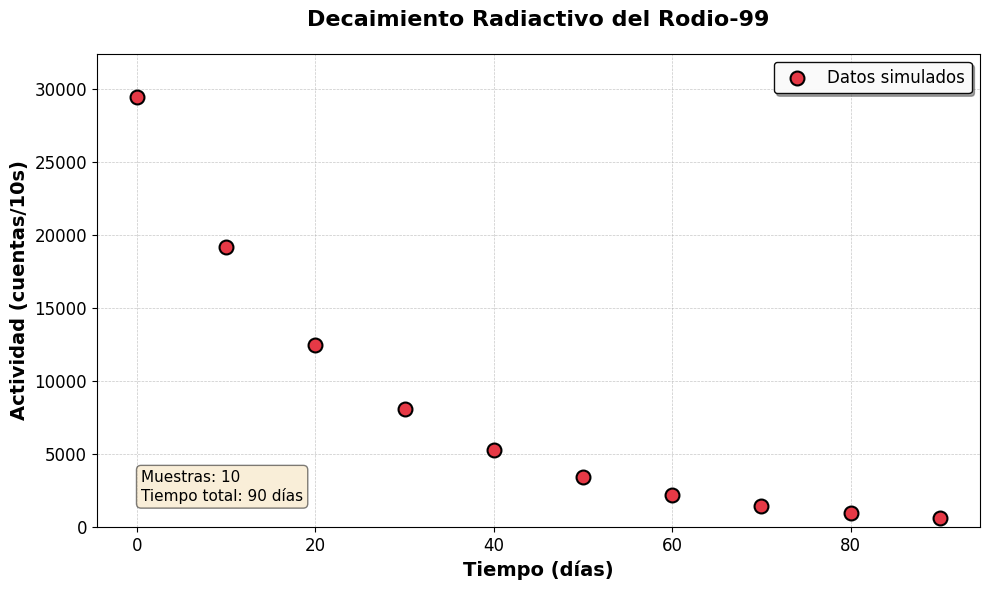

In [48]:
# Gráficamos los datos tal cual como se ven actualmente.
plt.figure(figsize=(10, 6), dpi=100)

# Gráfico de dispersión mejorado
plt.scatter(muestras['fecha_obs_dias'], muestras['cuentas'], 
           s=100,  # Tamaño de los puntos
           c='#E63946',  # Color rojo atractivo
           alpha=1,  # Transparencia
           edgecolors='black',  # Borde negro
           linewidth=1.5,  # Grosor del borde
           label='Datos simulados',
           zorder=3)  # Para que los puntos estén al frente

# Etiquetas y título
plt.xlabel('Tiempo (días)', fontsize=14, fontweight='bold')
plt.ylabel("Actividad (cuentas/10s)", fontsize=14, fontweight='bold')
plt.title('Decaimiento Radiactivo del Rodio-99', 
          fontsize=16, fontweight='bold', pad=20)

# Grid profesional
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.tick_params(axis='both', labelsize=12)

# Leyenda
plt.legend(loc='upper right', fontsize=12, framealpha=0.95, 
          edgecolor='black', fancybox=True, shadow=True)

# Ajustar límites del eje Y para mejor visualización
plt.ylim(0, muestras['cuentas'].max() * 1.1)

# Texto informativo
texto = f"Muestras: {len(muestras)}\nTiempo total: {muestras['fecha_obs_dias'].max()} días"

plt.text(0.05, 0.05, texto, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../figuras/datos_originales_Rh99.png', dpi=300, bbox_inches='tight')
plt.show()

Aunque con matplotlib podemos graficar el logaritmo, no podemos manipular esos datos. Por lo mismo, lo hacemos con Numpy y luego simplemente gráficamos los datos con el logaritmo.

In [8]:
# Calculamos el logaritmo de la columna cuentas y registramos en otra columna.
muestras['log(cuentas)'] = np.log(muestras['cuentas'])

# Buscamos la recta que mejor se ajuste a nuestros datos.
slope, intercept, r_value, p_value, std_err = linregress(muestras['fecha_obs_dias'], muestras['log(cuentas)'])
print(f"""Los datos resultantes son:\n- Pendiente de la recta = {slope}\n- intercepción con el eje Y = {intercept}\n- R^2 (Calidad del ajuste) = {r_value}\n- p_valor = {p_value}\n- Desviación estandar = {std_err}""")

Los datos resultantes son:
- Pendiente de la recta = -0.04307981459515198
- intercepción con el eje Y = 10.292111643002727
- R^2 (Calidad del ajuste) = -0.9999962864263239
- p_valor = 8.3204018218005225e-22
- Desviación estandar = 4.150888443828646e-05


Dado que nuestra ecuación de la recta es 

log(A(t)) = log(A_0) + lambda * t

donde lambda es la pendiente de la recta. Por lo tanto, lambda es igual a (0.04304 +- 0.00005) días⁻¹, teniendo en cuenta que el error esta dado por la desviación estándar obtenida del ajuste lineal.

Ahora, el tiempo de vida media del elemento podemos calcularlo con la ecuación:

T_{1/2} = ln(2)/lambda

In [9]:
# Calculamos el tiempo de vida 
t_half_life = np.log(2)/np.abs(slope)
print(f"El tiempo de vida media obtenido es {t_half_life}")

El tiempo de vida media obtenido es 16.089836668840938


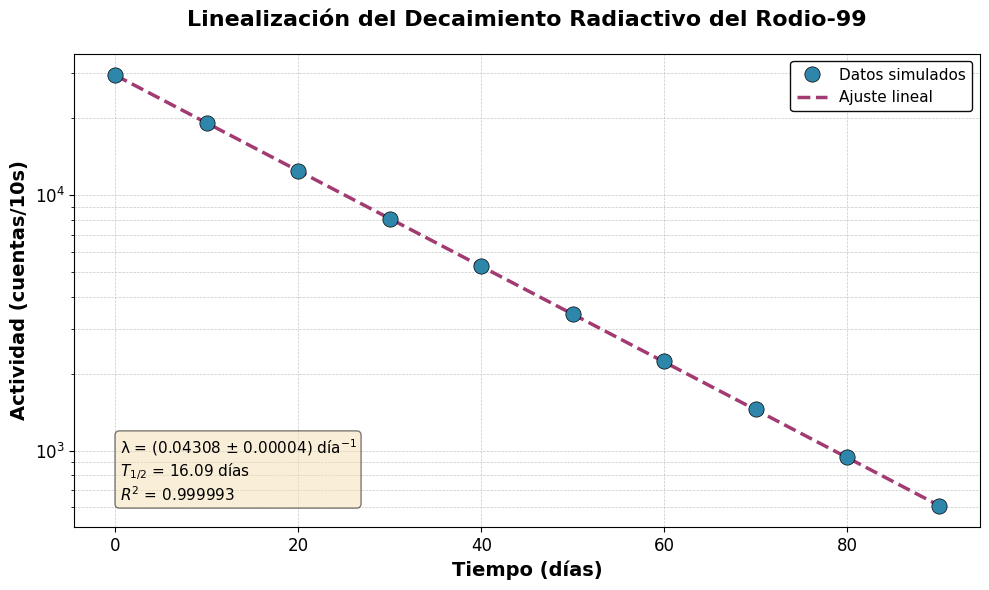

In [10]:
# Gráficamos los datos en escala logaritmica.
plt.figure(figsize=(10, 6), dpi=100)

# Datos experimentales
plt.semilogy(muestras['fecha_obs_dias'], muestras['cuentas'], 
             'o', color='#2E86AB', markersize=11, 
             markeredgecolor='black', markeredgewidth=0.5, 
             label='Datos simulados', zorder=3)

# Ajuste lineal
plt.semilogy(muestras['fecha_obs_dias'],
             (muestras['cuentas'].max()*np.exp(slope*muestras['fecha_obs_dias'])), 
             '--', color='#A23B72', linewidth=2.5, 
             label='Ajuste lineal', zorder=2)

# Etiquetas
plt.xlabel('Tiempo (días)', fontsize=14, fontweight='bold')
plt.ylabel("Actividad (cuentas/10s)", fontsize=14, fontweight='bold')
plt.title('Linealización del Decaimiento Radiactivo del Rodio-99', fontsize=16, fontweight='bold', pad=20)

# Grid y ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.tick_params(axis='both', labelsize=12)

# Leyenda
plt.legend(loc='upper right', fontsize=11, framealpha=0.95, 
           edgecolor='black', fancybox=True)

# Información estadística
texto = f'λ = ({abs(slope):.5f} ± {std_err:.5f}) día$^{{-1}}$\n'
texto += f'$T_{{1/2}}$ = {t_half_life:.2f} días\n'
texto += f'$R^2$ = {r_value**2:.6f}'
plt.text(0.05, 0.05, texto, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../figuras/linealización_decaimiento_Rh99.png', dpi=300, bbox_inches='tight')
plt.show()

**Resultado:**


Considerando la información entregada al inicio de nuestro documento, tenemos que se trata de un isótopo radioactivo del elemento Rodio (Rh). Y según el valor de su vida media, podemos identificar que se trata de Rh-99, el cual tiene una vida media de 16.1 días.

### Respuesta de la propuesta de proyecto
Ya se obtuvo el valor del tiempo de vida media del elemento, lo cual logramos porque logramos obtener el valor de la constante de decaimiento, por lo tanto, podemos calcular en que momento se alcanza 5 vidas medias de la muestra.

In [22]:
# Calculamos los valores de días para alcanzar la vida media.
times = []
i = 0
day = 0
while i < 5:
    day += t_half_life
    times.append(day)
    i += 1
    
print(f"Tenemos un total de {len(times)} momentos de medición.\nLos cuales son los días:\n- {times[0]}\n- {times[1]}\n- {times[2]}\n- {times[3]}\n- {times[4]}")

Tenemos un total de 5 momentos de medición.
Los cuales son los días:
- 16.089836668840938
- 32.179673337681876
- 48.269510006522815
- 64.35934667536375
- 80.4491833442047


Con los tiempo correctos a los que se alcanza la vida media, procedemos a calcular N(t) usando la ley de decaimiento radiactivo.

In [29]:
# Usamos la función toma_muestras para los días que anteriormente determinamos.
datos = de.toma_muestras(times, [10.0]*len(times))
datos.to_csv("../data/muestras_5_half_life.csv")
datos.head()

,fecha_obs_dias,t_obs_s,cuentas
0,16.089837,10.0,14749
1,32.179673,10.0,7381
2,48.269510,10.0,3651
3,64.359347,10.0,1843
4,80.449183,10.0,923


In [12]:
# Solo usar está línea si se desea cargar el archivo y no construir los datos desde cero.
datos = pd.read_csv("../data/muestras_5_half_life.csv")
datos.head(6)

,Unnamed: 0,fecha_obs_dias,t_obs_s,cuentas
0,0,16.089837,10.0,14749
1,1,32.179673,10.0,7381
2,2,48.269510,10.0,3651
3,3,64.359347,10.0,1843
4,4,80.449183,10.0,923


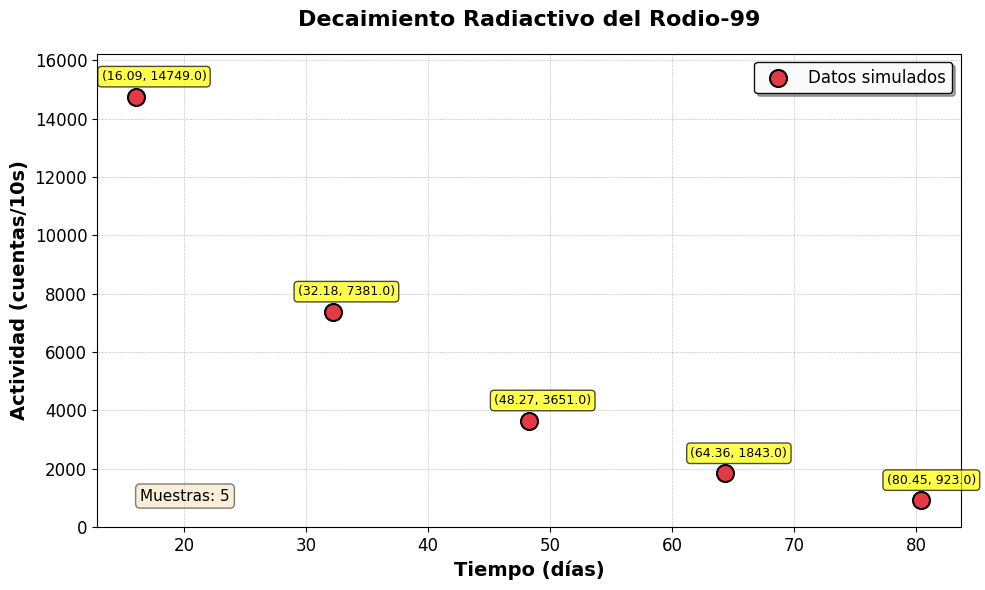

In [49]:
# Gráficamos los datos de los valores de las 5 vidas medias
plt.figure(figsize=(10, 6), dpi=100)

# Gráfico de dispersión mejorado
plt.scatter(datos['fecha_obs_dias'], datos['cuentas'], 
           s=150,  # Tamaño de los puntos
           c='#E63946',  # Color rojo atractivo
           alpha=1,  # Transparencia
           edgecolors='black',  # Borde negro
           linewidth=1.5,  # Grosor del borde
           label='Datos simulados',
           zorder=3)  # Para que los puntos estén al frente

# Añadir anotaciones con los valores de cada punto
for i in range(len(datos)):
    plt.annotate(f"({datos.iloc[i]['fecha_obs_dias']:.2f}, {datos.iloc[i]['cuentas']})",
                xy=(datos.iloc[i]['fecha_obs_dias'], datos.iloc[i]['cuentas']),
                xytext=(-25, 12),  # Desplazamiento del texto (5 puntos a la derecha y arriba)
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Etiquetas y título
plt.xlabel('Tiempo (días)', fontsize=14, fontweight='bold')
plt.ylabel("Actividad (cuentas/10s)", fontsize=14, fontweight='bold')
plt.title('Decaimiento Radiactivo del Rodio-99', 
          fontsize=16, fontweight='bold', pad=20)

# Grid profesional
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.tick_params(axis='both', labelsize=12)

# Leyenda
plt.legend(loc='upper right', fontsize=12, framealpha=0.95, 
          edgecolor='black', fancybox=True, shadow=True)

# Ajustar límites del eje Y para mejor visualización
plt.ylim(0, datos['cuentas'].max() * 1.1)

# Texto informativo
texto = f"Muestras: {len(datos)}"

plt.text(0.05, 0.05, texto, transform=plt.gca().transAxes,
         fontsize=11, verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../figuras/datos_5_half_life_Rh99.png', dpi=300, bbox_inches='tight')
plt.show()